In [1]:
import matplotlib.pyplot as plt
from scipy.stats import sem
from helpers import *
import numpy as np

In [2]:
import json
from io import open
with open("data/diplomacy_data.json", "r") as f:
    diplomacy = json.load(f)

## Splitting the entreis into two sets:
- entries that end with betrayal
- entries that don't end with betrayal

In [3]:
friendships = [entry for entry in diplomacy if entry["betrayal"]==False]

In [4]:
betrayal = [entry for entry in diplomacy if entry["betrayal"]==True]

## Betrayal entries

Average score per season for each future for **betrayer**

In [19]:
betrayal_betrayer = extract_features(betrayal,"betrayer",None,None,False)

Average score per season for each future for **victim**

In [20]:
betrayal_victim = extract_features(betrayal,"victim",None,None,False)

## Friendship entries

Average score per season for each future for **betrayer**

In [21]:
friendships_betrayer = extract_features(friendships,"betrayer",None,None,False)

Average score per season for each future for **victim**

In [22]:
friendships_victim = extract_features(friendships,"victim",None,None,False)

In [23]:
len(betrayal_betrayer[0])

663

## Imbalance

In [24]:
feature_names = ["politeness","nb_requests","nb_words","nb_sentences","positive sentiment","negative sentiment","neutral sentiment","premise","claim","comparison","expansion","contingency","temporal future","temporal rest"]

Calculating the imbalance for both friendship and betrayal entries

In [25]:
betrayal_imbalance=[]
friendship_imbalance =[] 
for i in range(len(betrayal_betrayer)):
    betrayal_imbalance.append([betrayal_betrayer[i][j] - betrayal_victim[i][j] for j in range(min(len(betrayal_betrayer[i]),len(betrayal_victim[i])))])
    friendship_imbalance.append([friendships_betrayer[i][j] - friendships_victim[i][j] for j in range(min(len(friendships_betrayer[i]),len(friendships_victim[i])))])

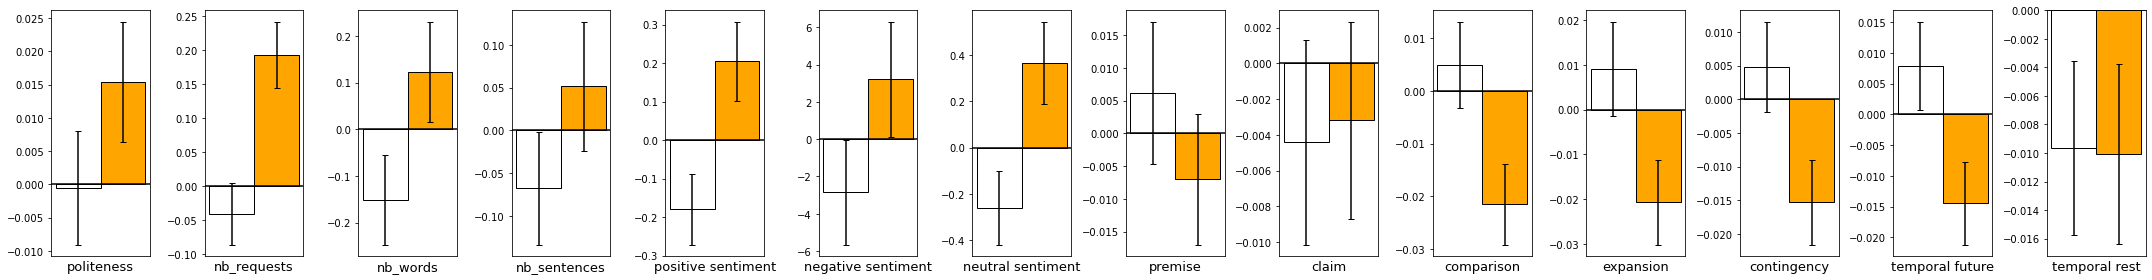

In [26]:
fig, ax = plt.subplots(1,14,figsize=(30,4))

width = 0.1
for i in range(14):
    rects_frien = ax[i].bar(0, np.mean(friendship_imbalance[i]),yerr=sem(friendship_imbalance[i]), label='No Betrayal',width=0.1,color='white',edgecolor="black", capsize=3)
    rects_betr = ax[i].bar(width, np.mean(betrayal_imbalance[i]),yerr=sem(betrayal_imbalance[i]), label='Betrayal',width=0.1,color='orange',edgecolor="black", capsize=3)
    ax[i].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False)
    ax[i].axhline(0, color='k')
    ax[i].set_xlabel(feature_names[i],fontsize=13)
plt.tight_layout()
plt.savefig('imbalance_plots.png')
plt.show()

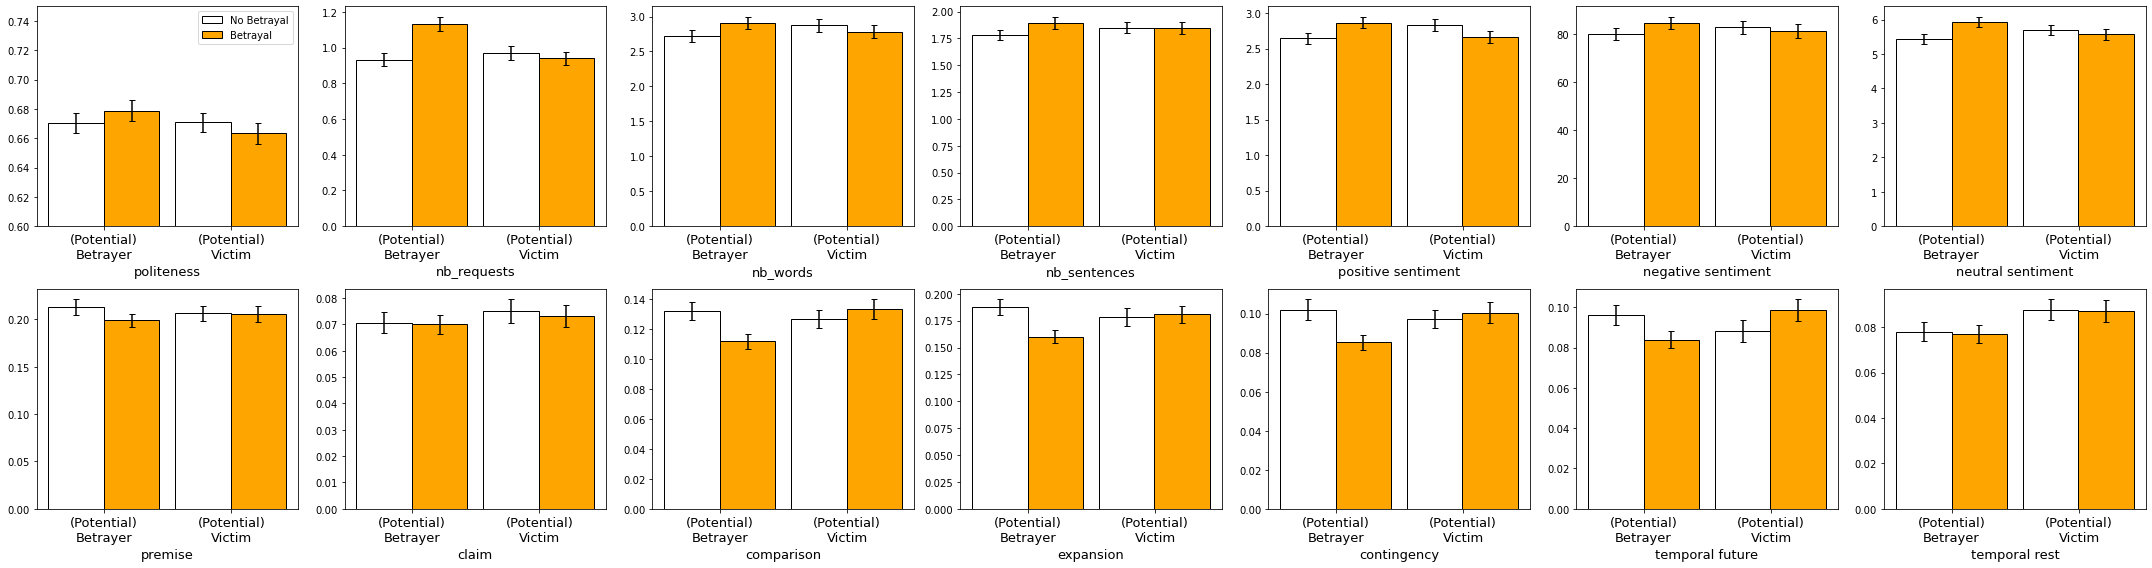

In [27]:
fig, ax = plt.subplots(2,7,figsize=(30,8))

width = 0.1
labels = ['(Potential)\nBetrayer', '(Potential)\nVictim']
j=0
for i in range(14):
    if(i>6):
        j=1
    x = [0.175,0.98]  # the label locations
    width = 0.30
    rects_frien = ax[j][i%7].bar((0,width+0.5), [np.mean(friendships_betrayer[i]),np.mean(friendships_victim[i])],yerr=[sem(friendships_betrayer[i]),sem(friendships_victim[i])], label='No Betrayal',width=0.35,color='white',edgecolor="black", capsize=3)
    rects_betr = ax[j][i%7].bar((width+0.05,width+0.85), [np.mean(betrayal_betrayer[i]),np.mean(betrayal_victim[i])], yerr=[sem(betrayal_betrayer[i]),sem(betrayal_victim[i])], label='Betrayal',width=0.35,color='orange',edgecolor="black", capsize=3)
    ax[j][i%7].set_xticks(x)
    ax[j][i%7].set_xticklabels(labels, fontsize=13)
    ax[j][i%7].set_xlabel(feature_names[i],fontsize=13)
    ax[0][0].set_ylim(0.6,0.75)
    ax[0][0].legend()
plt.tight_layout()
plt.savefig('imbalance_plots2.png')
plt.show()